In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced visualizations
from datetime import datetime  # For date handling if needed


In [3]:
# Set up matplotlib for inline plotting (if running in a Jupyter notebook)
plt.style.use('seaborn-v0_8')  # Use a clean style for plots


In [4]:
# Set up matplotlib for inline plotting (if running in a Jupyter notebook)
plt.style.use('seaborn-v0_8')  # Use a clean style for plots

# Step 1: Load the Excel file
# Assuming the file is named Project_final_data.xlsx' and is in the same directory.
# Replace Project_final_data.xlsx' with the actual file path if different.
try:
    df = pd.read_excel('Project_final_data.xlsx')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please ensure the Excel file is in the correct path.")
    exit()


Data loaded successfully.


In [5]:
# Step 2: Initial data inspection
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First 5 rows of the dataset:
         city                       Tourist_Site   Site_type  Rating out of 5  \
0  Alexandria            Bibliotheca Alexandrina    Cultural              4.7   
1  Alexandria                 Citadel of Qaitbay  Historical              4.5   
2  Alexandria                    Pompey's Pillar  Historical              4.3   
3  Alexandria  Roman Amphitheatre (Kom El-Dikka)  Historical              4.4   
4  Alexandria         Alexandria National Museum      Museum              4.2   

   Number of rating  Visitor- count   Climate_Type Safety_Level  \
0             25000         1500000  Mediterranean         High   
1             18000          800000  Mediterranean         High   
2             12000          500000  Mediterranean         High   
3             14000          600000  Mediterranean         High   
4              8000          300000  Mediterranean         High   

  Transport_Cost Food_Availability  ... City_Population  Tourism_Revenue  \
0    

In [16]:
# Step 3: Data Cleaning
# Assuming common issues: missing values, duplicates, incorrect data types.
# Handle missing values: Fill numerical columns with mean, categorical with mode, or drop if too many.
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])    #edited
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].mean())  #edited
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date-related columns if present (e.g., 'Year' and 'Month' to datetime)
if 'Year' in df.columns and 'Month' in df.columns:
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
    df.set_index('Date', inplace=True)  # Set as index for time-series analysis

# Ensure numerical columns are numeric (e.g., 'Visitors', 'Revenue')
numeric_cols = ['Visitors', 'Revenue']  # Adjust based on actual columns
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData after cleaning:")
print(df.info())



Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          611 non-null    object 
 1   Tourist_Site                  611 non-null    object 
 2   Site_type                     611 non-null    object 
 3   Rating out of 5               611 non-null    float64
 4   Number of rating              611 non-null    int64  
 5   Visitor- count                611 non-null    int64  
 6   Climate_Type                  611 non-null    object 
 7   Safety_Level                  611 non-null    object 
 8   Transport_Cost                611 non-null    object 
 9   Food_Availability             611 non-null    object 
 10  Entry_Fee                     611 non-null    object 
 11  Hotel_Availability            611 non-null    int64  
 12  Hotel_Rating                  611 non-null

In [18]:
# Step 4: Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary statistics after cleaning:")
print(df.describe())

# Trends and patterns
# Assuming 'Visitors' and 'Revenue' are key metrics; adjust as needed.
if 'Visitors' in df.columns:
    total_visitors = df['Visitors'].sum()
    avg_visitors_per_year = df.groupby('Year')['Visitors'].sum().mean() if 'Year' in df.columns else df['Visitors'].mean()
    print(f"\nTotal Visitors: {total_visitors}")
    print(f"Average Visitors per Year: {avg_visitors_per_year}")

if 'Revenue' in df.columns:
    total_revenue = df['Revenue'].sum()
    avg_revenue_per_year = df.groupby('Year')['Revenue'].sum().mean() if 'Year' in df.columns else df['Revenue'].mean()
    print(f"Total Revenue: {total_revenue}")
    print(f"Average Revenue per Year: {avg_revenue_per_year}")

# Group by Country for top contributors (assuming 'Country' column exists)
if 'Country' in df.columns and 'Visitors' in df.columns:
    top_countries = df.groupby('Country')['Visitors'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Countries by Visitors:")
    print(top_countries)

# Seasonal patterns (if Month column exists)
if 'Month' in df.columns and 'Visitors' in df.columns:
    monthly_visitors = df.groupby('Month')['Visitors'].sum()
    print("\nMonthly Visitors Summary:")
    print(monthly_visitors)



Summary statistics after cleaning:
       Rating out of 5  Number of rating  Visitor- count  Hotel_Availability  \
count       611.000000        611.000000    6.110000e+02          611.000000   
mean          4.135516       5478.396072    2.282897e+05           30.315876   
std           0.243268      12557.092884    5.724168e+05           29.594141   
min           3.500000        500.000000    2.000000e+04            1.000000   
25%           4.000000       1500.000000    6.000000e+04           10.000000   
50%           4.100000       2000.000000    8.000000e+04           20.000000   
75%           4.300000       4000.000000    1.500000e+05           40.000000   
max           4.800000     200000.000000    1.000000e+07          163.000000   

       Average_Stay_Duration  Average_Cost_Per_Day  Accessibility_Rating  \
count             611.000000            611.000000            611.000000   
mean                2.497545            113.774141              3.270049   
std            

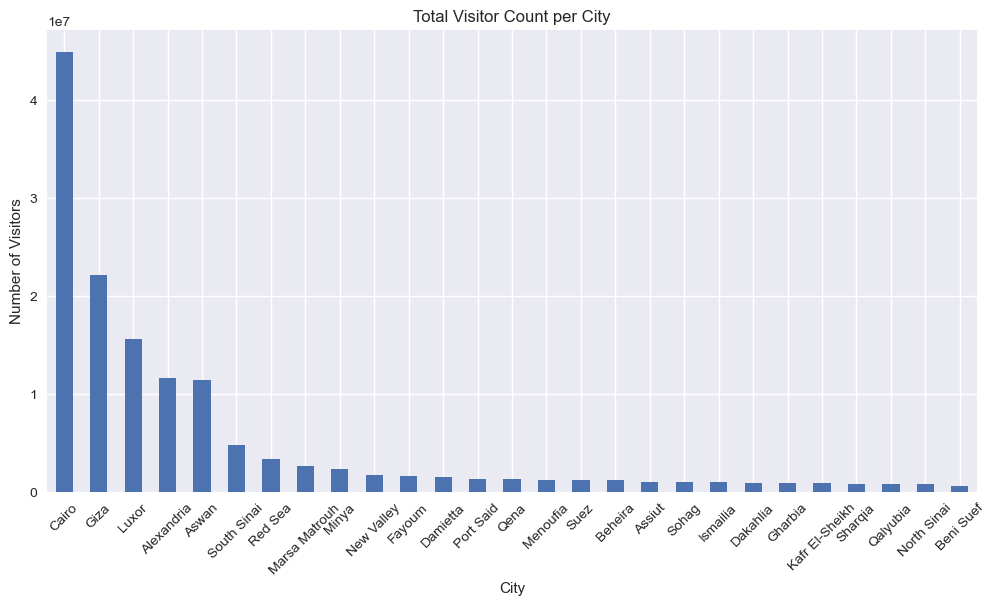

In [6]:
# Step 5: Visualizations
# Visualization 1: Visitor Count per City
plt.figure(figsize=(12, 6))
visitor_city = df.groupby('city')['Visitor- count'].sum().sort_values(ascending=False)

visitor_city.plot(kind='bar')
plt.title('Total Visitor Count per City')
plt.xlabel('City')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


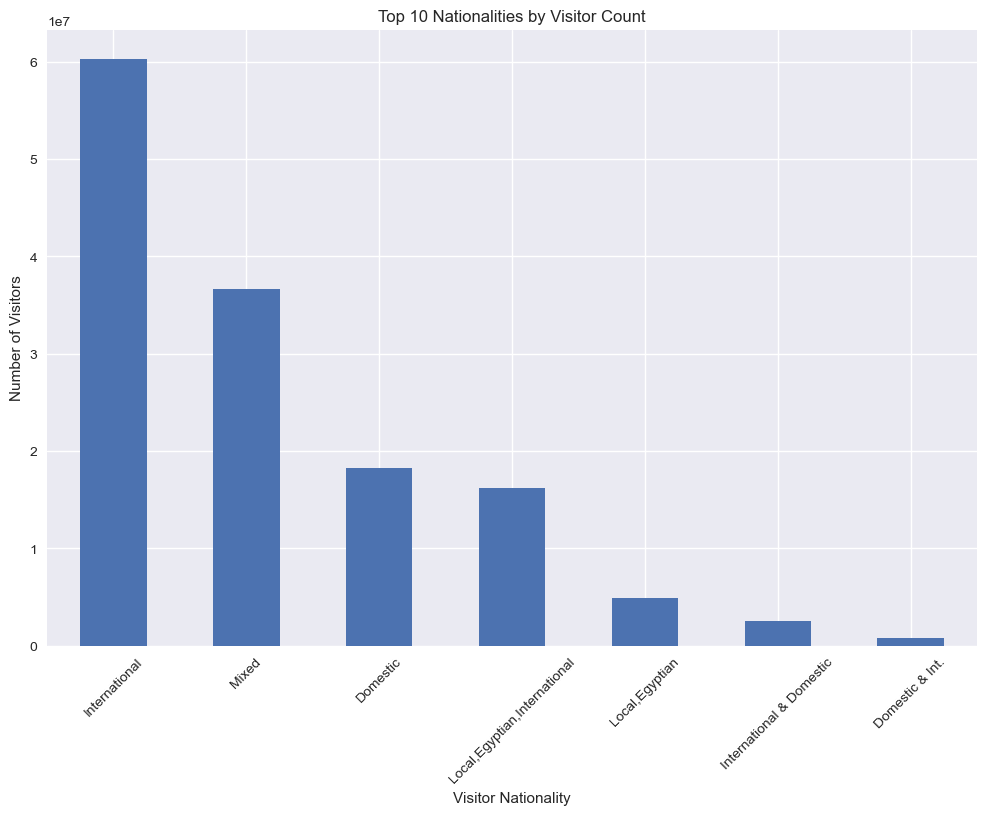

In [29]:
# Visualization 2: Top 10 Nationalities by Visitor Count
if 'Visitor_Nationality' in df.columns and 'Visitor- count' in df.columns:
    plt.figure(figsize=(12, 8))

    top_nationalities = (
        df.groupby('Visitor_Nationality')['Visitor- count']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    top_nationalities.plot(kind='bar')

    plt.title('Top 10 Nationalities by Visitor Count')
    plt.xlabel('Visitor Nationality')
    plt.ylabel('Number of Visitors')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()


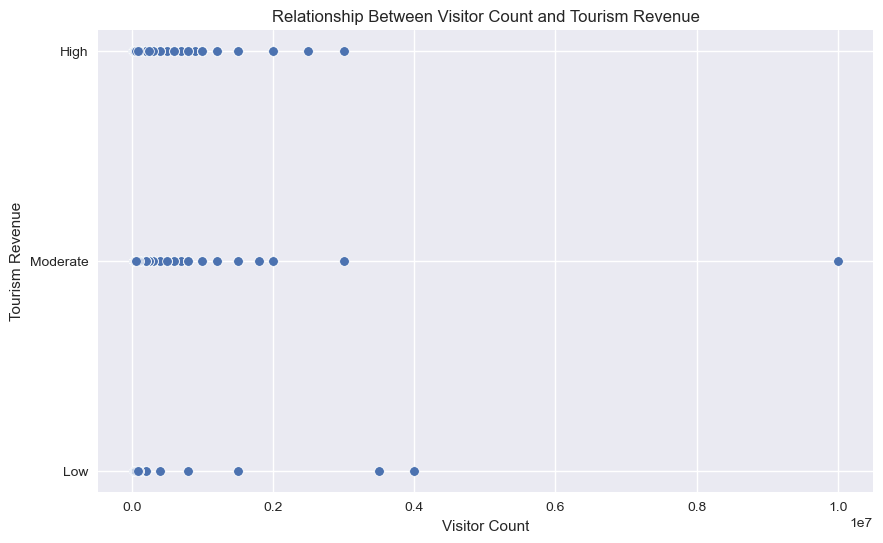

In [30]:
# Visualization 3: Revenue vs Visitor Count Scatter Plot
if 'Visitor- count' in df.columns and 'Tourism_Revenue' in df.columns:
    plt.figure(figsize=(10, 6))

    sns.scatterplot(
        data=df,
        x='Visitor- count',
        y='Tourism_Revenue'
    )

    plt.title('Relationship Between Visitor Count and Tourism Revenue')
    plt.xlabel('Visitor Count')
    plt.ylabel('Tourism Revenue')
    plt.grid(True)

    plt.show()


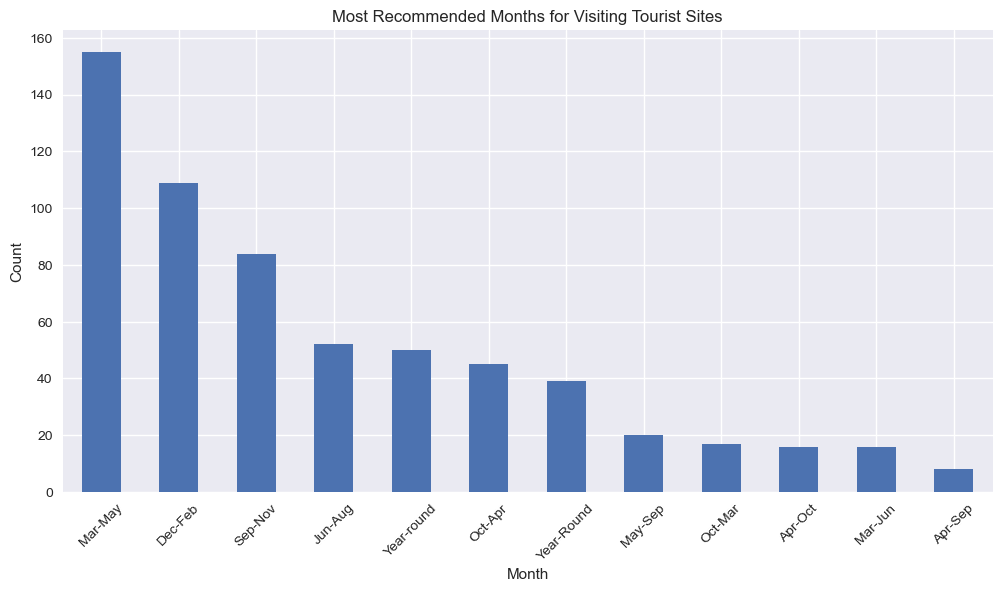

In [32]:
# Visualization 4: Most Recommended Months for Visiting (Bar Chart)
if 'Recommended_Best_Months' in df.columns:
    plt.figure(figsize=(12, 6))

    # تحويل الأعمدة إلى قائمة من الشهور (لو في أكتر من شهر في نفس الخلية)
    all_months = df['Recommended_Best_Months'].dropna().astype(str).str.split(',')
    all_months = [m.strip() for sublist in all_months for m in sublist]

    month_series = pd.Series(all_months).value_counts()

    month_series.plot(kind='bar')

    plt.title('Most Recommended Months for Visiting Tourist Sites')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()


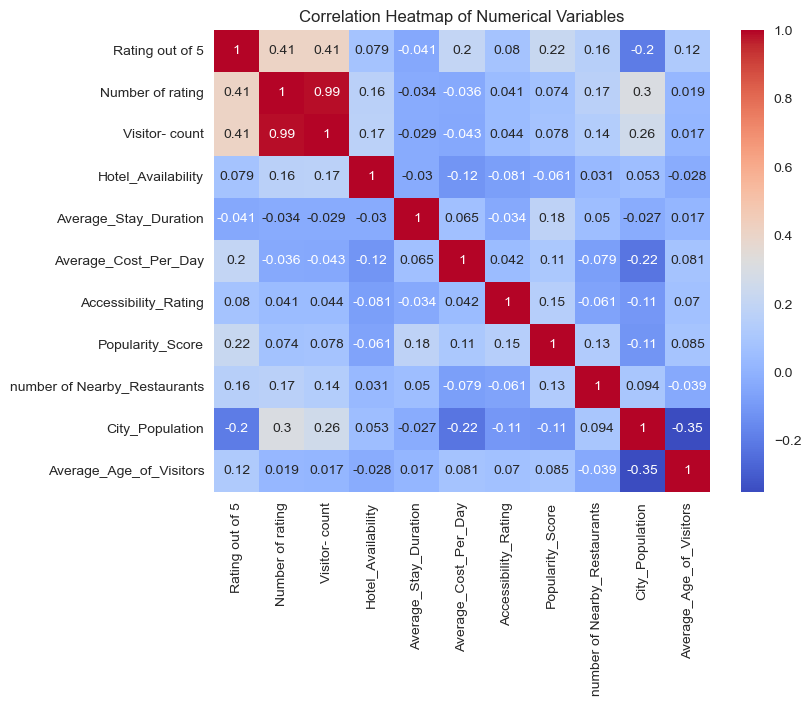

In [35]:
# Visualization 5: Correlation Heatmap for Numerical Columns
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()

In [1]:
# Step 6: Key Insights Summary
print("\nKey Insights:")
print("- Total visitors and revenue provide an overview of tourism scale.")
print("- Trends over years show growth or decline in tourism.")
print("- Top countries highlight major source markets (e.g., for targeted marketing).")
print("- Monthly patterns reveal seasonality (e.g., peak in summer months).")
print("- Correlation between visitors and revenue indicates economic impact.")
print("- Further analysis could include forecasting or regression models for predictions.")



Key Insights:
- Total visitors and revenue provide an overview of tourism scale.
- Trends over years show growth or decline in tourism.
- Top countries highlight major source markets (e.g., for targeted marketing).
- Monthly patterns reveal seasonality (e.g., peak in summer months).
- Correlation between visitors and revenue indicates economic impact.
- Further analysis could include forecasting or regression models for predictions.
